In [29]:
import numpy as np 
import pandas as pd 
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt 


Gradient Boosting Concept For Regression Problem 

In [30]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

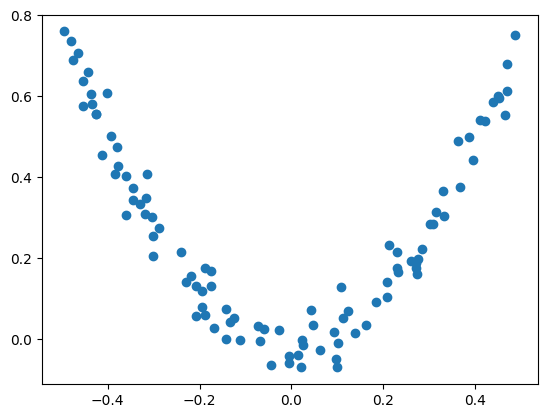

In [31]:
plt.scatter(X , y)
plt.show()


The Below concept is valid if loss function is MSE For Regression 

In [32]:
# In Gradient Boosting the First Model will Just give the avg of all y_true  
# y_pred1 = avg(of all y_true)   , this y_pred1 = y_pred_stage1
# Then we calculate the residual y_residual1 = y_true - y_pred_stage1
# now this y_residual1 will become output for second model x --> X ,y_true2--> y_residual1
# then 2nd model will be decisiontree regressor with 8 to 25 leaf nodes (generally)
# y_pred_stage2 = y_pred1 + learning_rate * y_pred2 , learning rate to avoid overfitting 
# generally learning_rate = 0.1

# y_residual2 = y_true - y_pred_stage2 , x --->x , y_tru2 -->y_residual2
# and so on , the final prediction 
# y_pred_stage_n =y_final_prediction = y_pred1 + learning_rate*(y_pred2 + y_pred3 + ...y_predn)

# basically after at each stage we are trying to reduce the extra value at stage 1 
# or increase if avg is less than corrected value


In [33]:
df = pd.DataFrame()
df['X'] = X.reshape(100)
df['y'] = y

In [34]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


In [35]:
df['pred_stage1'] = df['y'].mean()

In [36]:
df.head()

,X,y,pred_stage1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [37]:
df['res1'] = df['y']-df['pred_stage1']

In [38]:
df.head()

,X,y,pred_stage1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


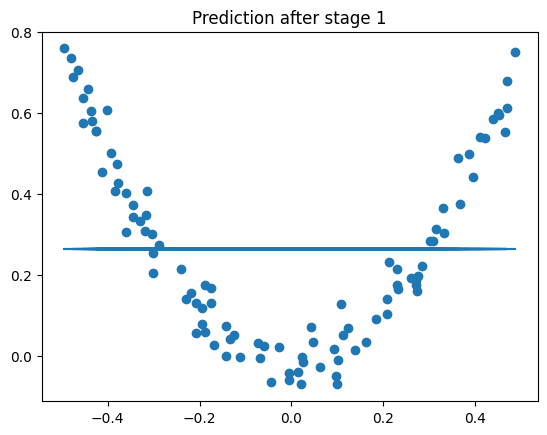

In [39]:
plt.scatter(df['X'] , df['y'])
plt.plot(df['X'] , df['pred_stage1'])
plt.title("Prediction after stage 1")
plt.show()

In [40]:
tree1 = DecisionTreeRegressor(max_leaf_nodes=8)
# It has been proven that Gradient Boost gives good result if leaf_node is in [8,25]

tree1.fit(X.reshape(100,1) ,df['res1'])


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


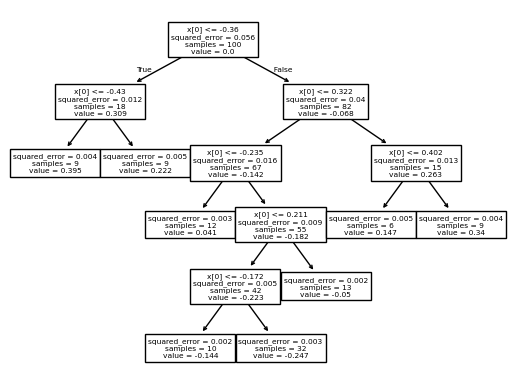

In [41]:
from sklearn.tree import plot_tree
plot_tree (tree1)
plt.show()

In [42]:
X_test = np.linspace(-0.5 , 0.5 , 500)
y_pred2 = tree1.predict(X_test.reshape(-1,1))
y_pred_stage2_test = df['pred_stage1'][0] + y_pred2   # considering learning rate2

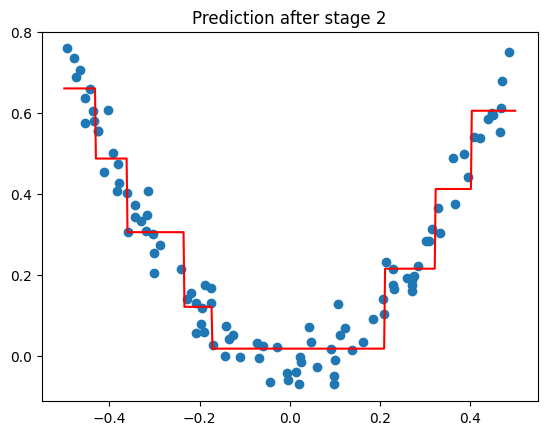

In [43]:
plt.scatter(df['X'] , df['y'])
plt.plot(X_test , y_pred_stage2_test , c='r')
plt.title("Prediction after stage 2")
plt.show()

In [44]:
df['y_pred_stage2'] = df['pred_stage1'] + tree1.predict( df['X'].values.reshape(-1,1) )
df['res2'] = df['y'] - df['y_pred_stage2']

In [45]:
df.head()

,X,y,pred_stage1,res1,y_pred_stage2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021


In [46]:
df['pred_stage1'].shape , y_pred2.shape

((100,), (500,))

In [47]:
tree2 = DecisionTreeRegressor(max_leaf_nodes=8)
tree2.fit(df['X'].values.reshape(-1,1) , df['res2'])

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [48]:
y_pred3 = tree2.predict(X_test.reshape(-1,1))
y_pred_stage3_test = df['pred_stage1'][0] + y_pred2 + y_pred3

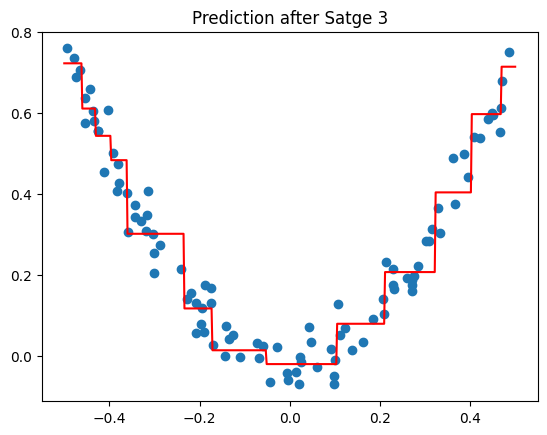

In [49]:
plt.scatter(df['X'] , df['y'])
plt.plot(X_test , y_pred_stage3_test , c='r')
plt.title("Prediction after Satge 3")
plt.show()

In [54]:
df['y_pred_stage3'] = df['pred_stage1'] + sum(reg.predict(df['X'].values.reshape(-1,1)) for reg in [tree1 , tree2])
df['res3'] = df['y'] - df['y_pred_stage3']

In [55]:
df.head()

,X,y,pred_stage1,res1,y_pred_stage2,res2,y_pred_stage3,res3
0,-0.125460,0.051573,0.265458,-0.213885,0.018320,0.033253,0.014321,0.037252
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404,0.597523,-0.003043
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732,0.207423,-0.041371
3,0.098658,-0.070178,0.265458,-0.335636,0.018320,-0.088497,-0.019811,-0.050367
4,-0.343981,0.343986,0.265458,0.078528,0.305965,0.038021,0.301966,0.042020


In [56]:
tree3 = DecisionTreeRegressor(max_leaf_nodes=8)
tree3.fit(df['X'].values.reshape(-1,1) , df['res3'])

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,8
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [57]:
y_pred4 = tree3.predict(X_test.reshape(-1,1))
y_pred_stage4_test = df['pred_stage1'][0] + y_pred2 + y_pred3 + y_pred4

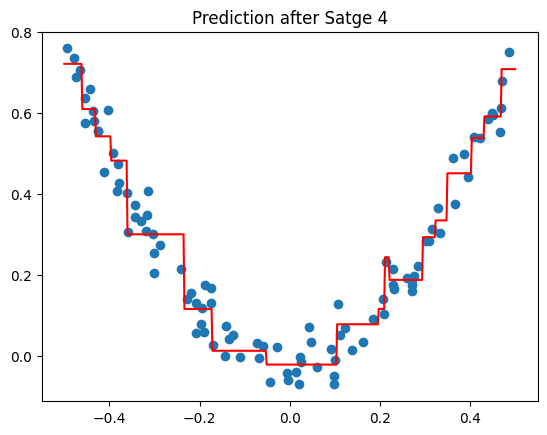

In [58]:
plt.scatter(df['X'] , df['y'])
plt.plot(X_test , y_pred_stage4_test , c='r')
plt.title("Prediction after Satge 4")
plt.show()

In [59]:
# After Some iteration it will perefectlly match to the target curve 

In [ ]:


def GradientBoost (X , y  , lr=1 , itr=10):
    y_mean = np.mean(y)
    y_mean_plot = np.full(100 , y_mean)
    X_test = np.linspace(-0.5 , 0.5 ,500)
    X_test = X_test.reshape(-1,1)
    y_pred_train = []
    y_pred_test = []
    plt.scatter(X , y)
    plt.plot(X , y_mean_plot , c='r')
    plt.title("Prediction at stage 1")
    plt.show()
    res =0
    for i in range(itr-1):
        res = res
        tree = DecisionTreeRegressor(max_leaf_nodes=10)
        if i==0:
            Res = y-y_mean
        else :
            Res = res
        tree.fit(X ,Res)
        y_pred_train.append(tree.predict(X))
        y_pred_test.append(tree.predict(X_test))
        y_pred = y_mean + lr*(np.sum(y_pred_train , axis=0))     # row wise sum
        res = y - y_pred
        y_pred_test_stage = y_mean + lr*(np.sum(y_pred_test , axis=0))   # row wise sum
        

        plt.scatter(X , y)
        plt.plot(X_test , y_pred_test_stage , c='r')
        plt.title(f"Prediction at stage {i+2}")
        plt.show()
        

In [70]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
X = X.reshape(-1,1)

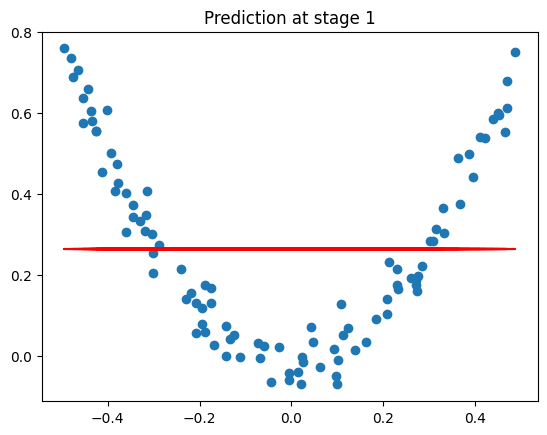

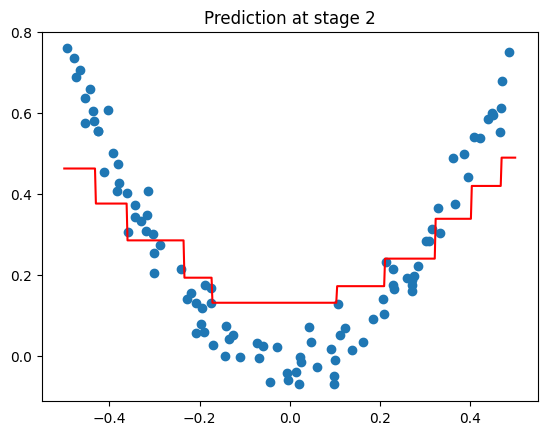

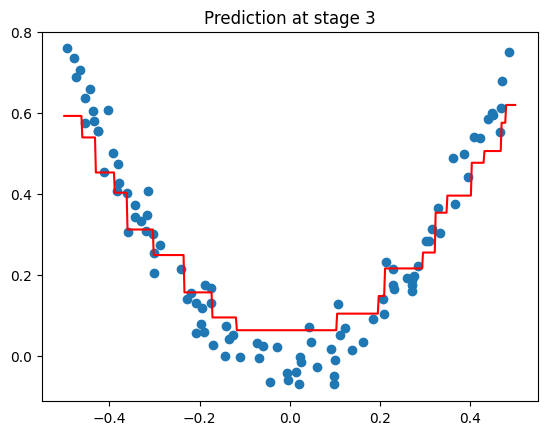

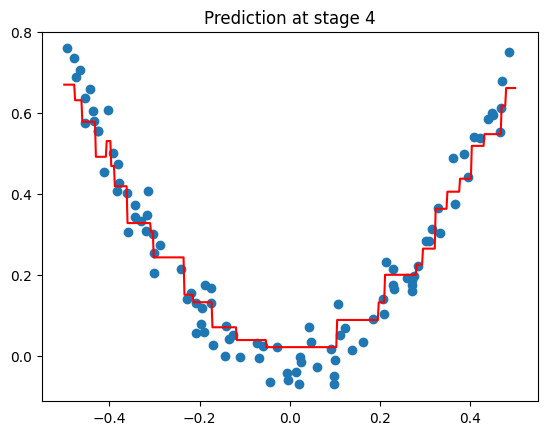

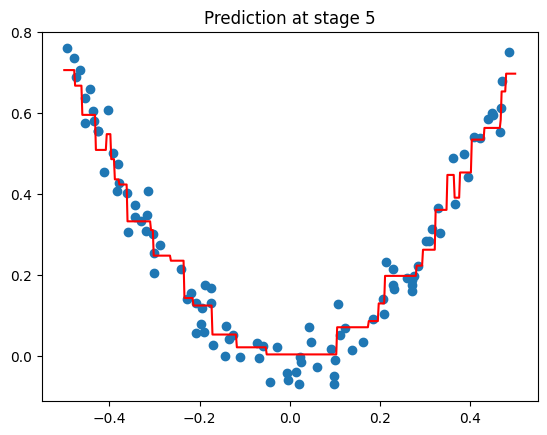

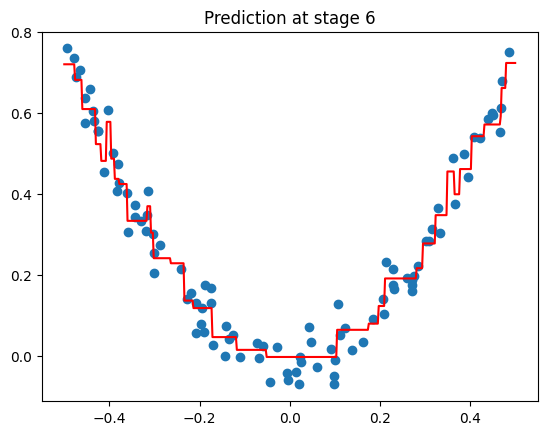

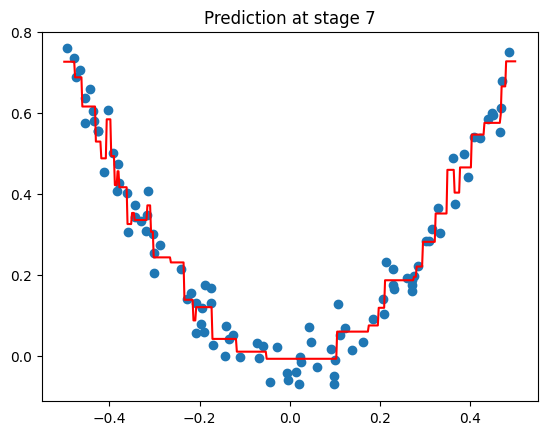

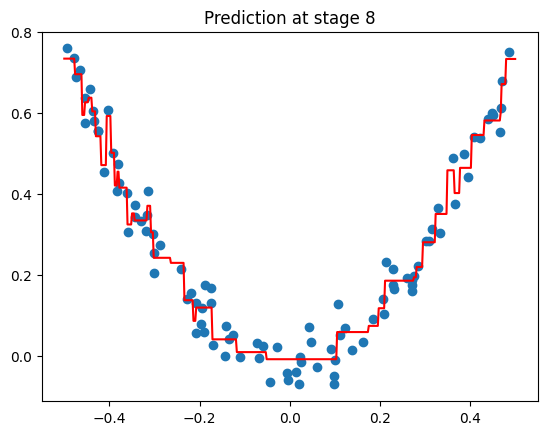

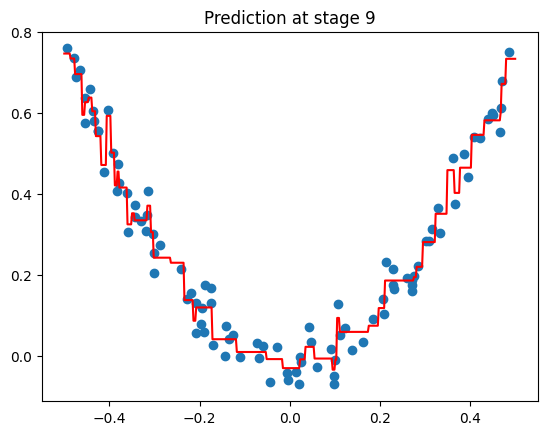

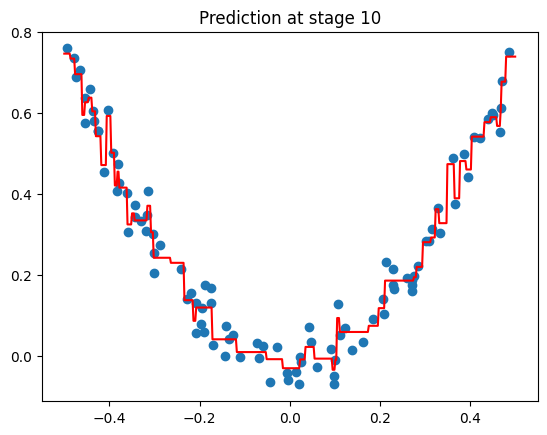

In [73]:
GradientBoost( X , y , lr=0.5)

In [72]:
# if Learning rate is 1 then in 10th stage it is overfitting 

In [ ]:
# So to reduce the overfitting lets take lr = 0.5

In [ ]:
# Similar Concept is there for  classification also 
# At every stage we calculate log-odd then convert that log-odd in to prob for each instance
# log-odd1 = log(p/1-p)   , p = prob of positive class(1)
# for 2 class log-odd1 = log(no of 1 class instance / no of 0 class instance)

# pred_prob1 = 1/(1+e^-log-odd)  this is the output at stage 1

# then first model will be trained for res as output of model , res1 = y_true(0,1) - pred_prob1
# here also each model is decisiontree regressor it will give some nodel value for each instance 
# for each nodel value we calculate the log-odd then corresponding to each instance we 
# can know that , it belongs to which leaf node 
#                                  summation of residual of each instance which is falling in this leaf node
# log-odd_at_each node = ---------------------------------------------------------------------------------------------
#                         summation  of all instance which is falling in this leaf node(previous prob * (1-previous prob))

# once we calculate the log-odd at each node of this model , then we can calulate the log-odd of 
# each instance by finding out which node belongs to which instance , log-odd corresponding 
# to that leaf node will be log-odd of that instance 
# then we can calculate the probablity  , pred_preob2 = 1/(1+e^-log-odd) for each instance

# output at 2nd stage = pred_prob1 + pred_prob2
# then 2nd model will be trained on res2 , res2 = y_true(0,1) - (y_pred1+y_pred2)

# same procesdure will be repeated and we will calculate pred_prob3 
# then output at 3rd stage (pred_prob_combine) = pred_prob1 + pred_prob2 + pred_prob3


# we can introduce the learning rate to avoide overfitting 

# then pred_prob_overall = learning_rate*(pred_prob1 + pred_prob2 + .....)
# res = y_true - learnin_rate*(pred_prob1+pred_prob2+ ......)

In [ ]:
# for multiclass classification insted of calculation one log-odd for each isnatnce 
# we calculate k log-odd for each instance , k = no class 
# then we use softmax on log-odds or log-logits for each class 

In [ ]:
# here for binary class we did 
# prob = 1/(1+e^-log-odd)   , this is nothing but sigmoid ,which is 
# special form of softmax if class is 2 ( 1 and 0 ) , binary classification 

# 🌳 Multiclass Gradient Boosting (with Softmax)

## 🔹 Loss Function
We use the **multiclass log-loss** (cross-entropy):

$$
L = - \sum_{i=1}^n \sum_{k=1}^K y_{i,k} \log p_{i,k}
$$

where  

$$
p_{i,k} = \frac{e^{F_k(x_i)}}{\sum_{j=1}^K e^{F_j(x_i)}}, 
\quad 
y_{i,k} = \begin{cases} 
1 & \text{if } y_i = k \\ 
0 & \text{otherwise} 
\end{cases}
$$

---

## 🔹 Residuals (Negative Gradients)
We compute the gradient of the loss w.r.t. the logit $F_k(x_i)$:

$$
\frac{\partial L}{\partial F_k(x_i)} = p_{i,k} - y_{i,k}
$$

Thus, the **residuals** are:

$$
r_{i,k} = - \frac{\partial L}{\partial F_k(x_i)} = y_{i,k} - p_{i,k}
$$

---

## 🔹 Training Algorithm
For \(K\) classes and \(T\) boosting iterations:

1. **Initialization**:
   $$
   F_{0,k}(x) = 0 \quad \forall k \in \{1, \dots, K\}
   $$

2. **For each iteration \(t = 1, \dots, T\):**
   - For each class \(k\):
     - Compute residuals:  
       $$
       r_{i,k} = y_{i,k} - p_{i,k}
       $$
     - Fit a regression tree $h_{t,k}(x)$ to predict $r_{i,k}$.
     - Update logits:
       $$
       F_{t,k}(x) = F_{t-1,k}(x) + \nu \cdot h_{t,k}(x)
       $$
       where $\nu \in (0,1]$ is the learning rate.

👉 Total number of trees trained:  
$$
T \times K
$$

---

## 🔹 Inference (Prediction)
For a new instance \(x\):

1. Collect final logits:
$$
F_{T,k}(x) = F_{0,k}(x) + \sum_{t=1}^T \nu \cdot h_{t,k}(x)
$$

2. Convert to probabilities using softmax:
$$
P(y = k \mid x) = \frac{e^{F_{T,k}(x)}}{\sum_{j=1}^K e^{F_{T,j}(x)}}
$$

3. Predicted class:
$$
\hat{y} = \arg\max_k \, P(y = k \mid x)
$$


Intialization Of Logits

# Initialization in Gradient Boosting for Multi-class Classification

In theory, we often initialize the logits as  

$$
F_{0,k}(x) = 0 \quad \forall k \in \{1, \dots, K\},
$$  

meaning the model starts with no prior knowledge and learns corrections iteratively.  

In practice, however, many implementations (e.g., `scikit-learn`, `XGBoost`, `LightGBM`)  
initialize the logits using the **class prior probabilities**.  

Let  

$$
p_k = \frac{1}{N}\sum_{i=1}^N \mathbb{I}\{y_i = k\},
$$  

be the prior probability of class \(k\), where \(\mathbb{I}\{y_i = k\}\) is the indicator function,  
which equals \(1\) if \(y_i = k\) and \(0\) otherwise, and \(N\) is the total number of training samples.  

Then the initialization is  

$$
F_{0,k}(x) = \log \frac{p_k}{p_{\text{ref}}},
$$  

where \(p_{\text{ref}}\) is the probability of a chosen reference class  
(often the last class, or equivalently normalization across all classes).  
